使用最小二乘法（矩阵）拟合模型：$$z = ax + by + c \\ Z = X\beta$$

- $X$ - 设计矩阵，包含 x、y 和一列1（截距项）
- $\beta$ - 参数向量 $\begin{bmatrix}a \\ b \\ c\end{bmatrix}$
- $Z$ - 观测值向量

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [79]:
# 1. 定义模型（矩阵形式）
def model_matrix(params, x, y):
    a, b, c = params
    return a * x + b * y + c

In [80]:
# 2. 生成模拟数据
def generate_data(a_true, b_true, c_true, noise_level=0.1, num_points=50):
    np.random.seed(42)
    x = np.random.rand(num_points)
    y = np.random.rand(num_points)
    z_true = model_matrix([a_true, b_true, c_true], x, y)
    z_noisy = z_true + noise_level * np.random.randn(num_points)
    return x, y, z_noisy

In [81]:
a_true, b_true, c_true = 2.5, -1.3, 0.7
x, y, z_observed = generate_data(a_true, b_true, c_true)

`np.column_stack`原理：

- 将多个一维数组按列堆叠成二维矩阵
- 输入是一组一维数组，输出是一个矩阵，每列对应一个输入数组。

示例：
```py
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
X = np.column_stack((x, y, np.ones_like(x)))
```
输出：
```py
array([[1., 4., 1.],
       [2., 5., 1.],
       [3., 6., 1.]])
```

In [82]:
# 3. 构建设计矩阵 X 和观测值向量 Z
def build_matrix(x, y):
    X = np.column_stack((x, y, np.ones_like(x)))  # 设计矩阵: [x, y, 1]
    return X

In [83]:
X = build_matrix(x, y)
Z = z_observed

In [84]:
# 4. 使用正规方程求解参数
def solve_least_squares(X, Z):
    params, residuals, rank, singular_values = np.linalg.lstsq(X, Z, rcond = None)
    return params

In [85]:
params_optimal = solve_least_squares(X, Z)

In [86]:
print(f"真实参数: a={a_true}, b={b_true}, c={c_true}")
print(f"拟合参数: a={params_optimal[0]:.4f}, b={params_optimal[1]:.4f}, c={params_optimal[2]:.4f}")


真实参数: a=2.5, b=-1.3, c=0.7
拟合参数: a=2.3671, b=-1.3168, c=0.7695


In [87]:
z_predicted = model_matrix(params_optimal, x, y)

In [88]:
# 5. 可视化结果
def plot_results(x, y, z_observed, z_predicted, params_optimal):
    fig = plt.figure(figsize=(12, 6))
    
    # 原始数据与拟合平面
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(x, y, z_observed, color='red', label='Observed Data')
    x_grid, y_grid = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
    z_grid = model_matrix(params_optimal, x_grid, y_grid)
    ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.5, color='blue', label='Fitted Plane')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Data and Fitted Plane')
    ax.legend()
    
    plt.tight_layout()
    plt.show()


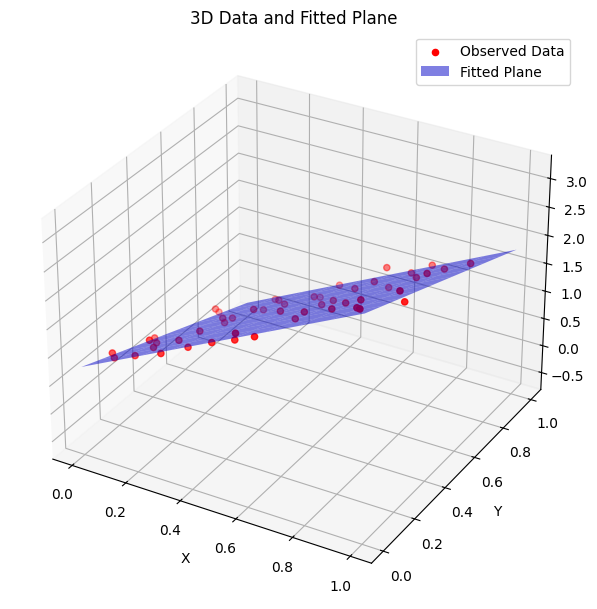

拟合参数: a=2.3671, b=-1.3168, c=0.7695


In [89]:
plot_results(x, y, z_observed, z_predicted, params_optimal)
print(f"拟合参数: a={params_optimal[0]:.4f}, b={params_optimal[1]:.4f}, c={params_optimal[2]:.4f}")
